In [1]:
'''
This is an example script on how to use the read_tripex function from radar_library
The existence of this script doesn't mean that radar_library shouldn't be properly documented and possibly installed with a distutils script
'''

from datetime import datetime
from radar_library import *


In [2]:
# Timerang of the statistics
dt0 = datetime(2015, 12, 13)
dt1 = datetime(2015, 12, 14)

# which variables do you want? make a list from the available
#variables = available_vars
variables = ['Z10', 'Z35', 'Z94', 'V10', 'V35', 'V94', 'T']

# Rainrate from Pluvio averaged over how many minutes?
accMins = 5

# Moving window wighted average (in minutes) for mean Doppler velocities to compensate for waves
# Leave an empty list if you do not want averages
# The average will appear for every frequency as a new variable name V{freq}m{avgV}
avgV = [5, 20] # here we average over 5 and 20 minutes

In [3]:
%%time
tripex = read_tripex(dt0, dt1, variables, accMins=5, avgV=[5, 20])

CPU times: user 11.2 s, sys: 1.94 s, total: 13.1 s
Wall time: 12 s


In [4]:
%%time
##############################################################################################################
# DO SOME FILTERING 
# For example take only stuff with RR > 1 mm/h
# Or take only stuff after 06UTC for spinup time 
##############################################################################################################
#high = tripex.where(tripex.RR >= 1.0, drop=True)
high = tripex.where(tripex.T >= -90.0, drop=True)



/home/dori/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: xarray.Dataset.T has been deprecated as an alias for `.transpose()`. It will be removed in xarray v0.11.
  import sys
/usr/local/lib/python3.5/dist-packages/dask/local.py:255: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


CPU times: user 3.29 s, sys: 381 ms, total: 3.67 s
Wall time: 2.87 s


/usr/local/lib/python3.5/dist-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


In [5]:
%%time
##############################################################################################################
# DO SOME HISTOGRAMS 
# This part hopefully is not too slow
##############################################################################################################
flat = high.Z35.values.flatten()
mask = np.isfinite(flat)
hst, xe, ye = np.histogram2d(flat[mask], np.tile(high.range, len(high.time))[mask], bins=(100,50))

/usr/local/lib/python3.5/dist-packages/dask/local.py:255: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


CPU times: user 541 ms, sys: 44.2 ms, total: 585 ms
Wall time: 449 ms


In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
norm = colors.LogNorm(vmin=np.nanmin(hst[np.nonzero(hst)]),
                      vmax=np.nanmax(hst))
plt.pcolormesh(xe, ye, hst.T, norm=norm)
plt.colorbar()

In [7]:
hst.shape

(100, 50)

/usr/local/lib/python3.5/dist-packages/dask/local.py:255: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


CPU times: user 942 ms, sys: 108 ms, total: 1.05 s
Wall time: 769 ms


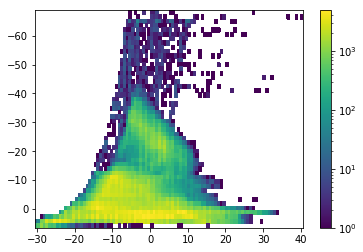

In [8]:
%%time
##############################################################################################################
# DO SOME HISTOGRAMS 
# This part hopefully is not too slow
##############################################################################################################
flat = high.Z10.values.flatten()
mask = np.isfinite(flat)
hst, xe, ye = np.histogram2d(flat[mask], high['T'].values.flatten()[mask], bins=(100,50))
norm = colors.LogNorm(vmin=np.nanmin(hst[np.nonzero(hst)]),
                      vmax=np.nanmax(hst))
plt.pcolormesh(xe, ye, hst.T, norm=norm)
plt.colorbar()
plt.gca().invert_yaxis()

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


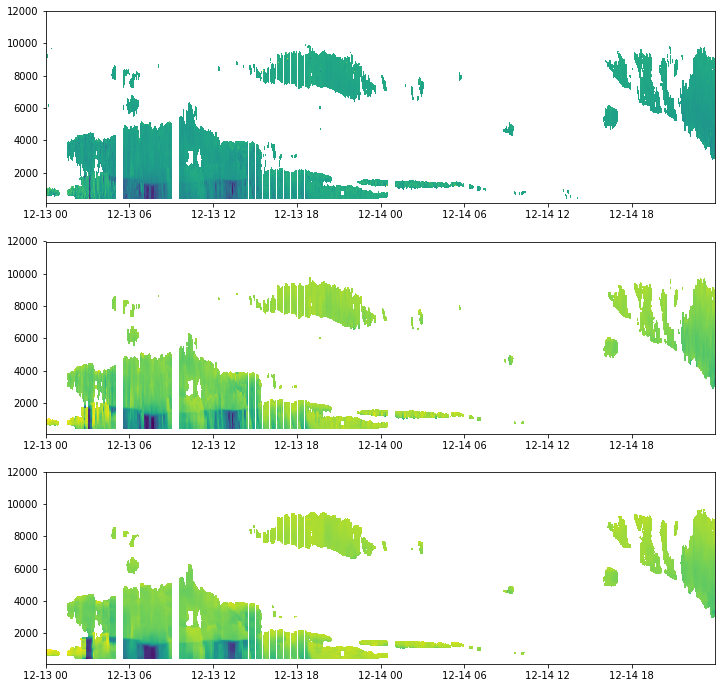

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
axs[0].pcolormesh(tripex.time, tripex.range, tripex.V35)
axs[1].pcolormesh(tripex.time, tripex.range, tripex.V35m5)
axs[2].pcolormesh(tripex.time, tripex.range, tripex.V35m20)